This research involved the use of Secondary Data gotten from https://fenixservices.fao.org/faostat/static/bulkdownloads/Food_Security_Data_E_All_Data.zip  from FAOSTAT https://www.fao.org/faostat/en/#data/FS/visualize 
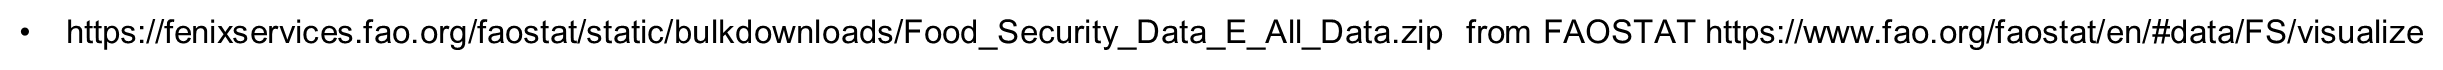 

The research goal is to use Prevalence of Undernourishment as Predictor Model Based on 10 Features as a determinant for Food Inseucrity Analyses and Prediction System Model with the use of Regression Models.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [119]:
data = pd.read_csv('project data.csv')
data

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


# Number of Missing Values

In [5]:
data.isnull().sum()

Year                                                                                                     0
Prevalence of undernourishment (percent) (3-year average) %                                              0
Percent of arable land equipped for irrigation (percent) (3-year average) %                              2
Average dietary energy supply adequacy (percent) (3-year average) %                                      0
Value of food imports in total merchandise exports (percent) (3-year average) %                          1
Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)    2
Percentage of population using safely managed drinking water services (Percent)                          1
Percentage of population using at least basic drinking water services (percent)                          1
Prevalence of obesity in the adult population (18 years and older)                                       2
Gross domestic product per capita, PP


# Take care of missing data

In [6]:
data_new = data.copy()
data_new

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


In [7]:
data_new.shape

(19, 13)

# The Descriptive Analysis 

In [8]:
# rename the columns.
data_new.describe()

,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
count,19.000000,17.000000,19.000000,18.000000,17.000000,18.000000,18.000000,17.000000,19.000000,16.000000,19.000000,19.000000
mean,8.721053,0.864706,122.631579,7.944444,65.058824,17.916667,59.716667,6.188235,4508.400000,17.431250,-1.910526,30.210526
std,1.827743,0.049259,2.564946,2.508157,1.951621,1.479765,7.350250,1.556391,825.547682,1.856778,0.198592,9.548583
min,6.600000,0.800000,118.000000,6.000000,63.000000,15.400000,48.200000,4.000000,2977.000000,15.100000,-2.210000,14.000000
25%,7.550000,0.800000,121.000000,6.000000,63.000000,16.775000,53.850000,4.900000,3925.700000,15.925000,-2.035000,24.000000
50%,8.800000,0.900000,122.000000,7.000000,65.000000,18.000000,59.700000,6.000000,4690.400000,16.600000,-1.960000,30.000000
75%,9.250000,0.900000,124.500000,8.750000,66.000000,19.125000,65.575000,7.400000,5172.750000,19.200000,-1.805000,33.000000
max,14.600000,0.900000,127.000000,14.000000,68.000000,20.100000,71.400000,8.900000,5516.400000,20.300000,-1.460000,51.000000


# Fill in The  Missing Values

In [9]:
data_new.isnull()

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# find ways to fill data
data_new = data_new.interpolate(method='linear', limit_direction='forward')
data_new

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


In [11]:
data_new.columns.values

array(['Year',
       'Prevalence of undernourishment (percent) (3-year average) %',
       'Percent of arable land equipped for irrigation (percent) (3-year average) %',
       'Average dietary energy supply adequacy (percent) (3-year average) %',
       'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day

In [12]:
df = data_new.copy()
df

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


# Test for Normality

In [94]:
# Histogram Plot
import plotly.express as px
import plotly.io as pio

# create a plot
fig = px.histogram(df['Prevalence of undernourishment (percent) (3-year average) %'],
                   x = 'Prevalence of undernourishment (percent) (3-year average) %',
                   marginal = 'box', histnorm= 'probability density'
                   )


fig.show()

fig.write_image("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/fig2.png")

In [97]:
# the boxplot for POU 

figs = px.box(df['Prevalence of undernourishment (percent) (3-year average) %'])
figs.show()

figs.write_image("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/PouBoxplot.png")

In [84]:
import plotly.figure_factory as ff
group_labels = ['Prevalence of undernourishment (percent) (3-year average) %']

fig = ff.create_distplot([df['Prevalence of undernourishment (percent) (3-year average) %']],
                         group_labels, bin_size=.3, show_rug=False)
fig.show()

fig.write_image("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/fig1.png")

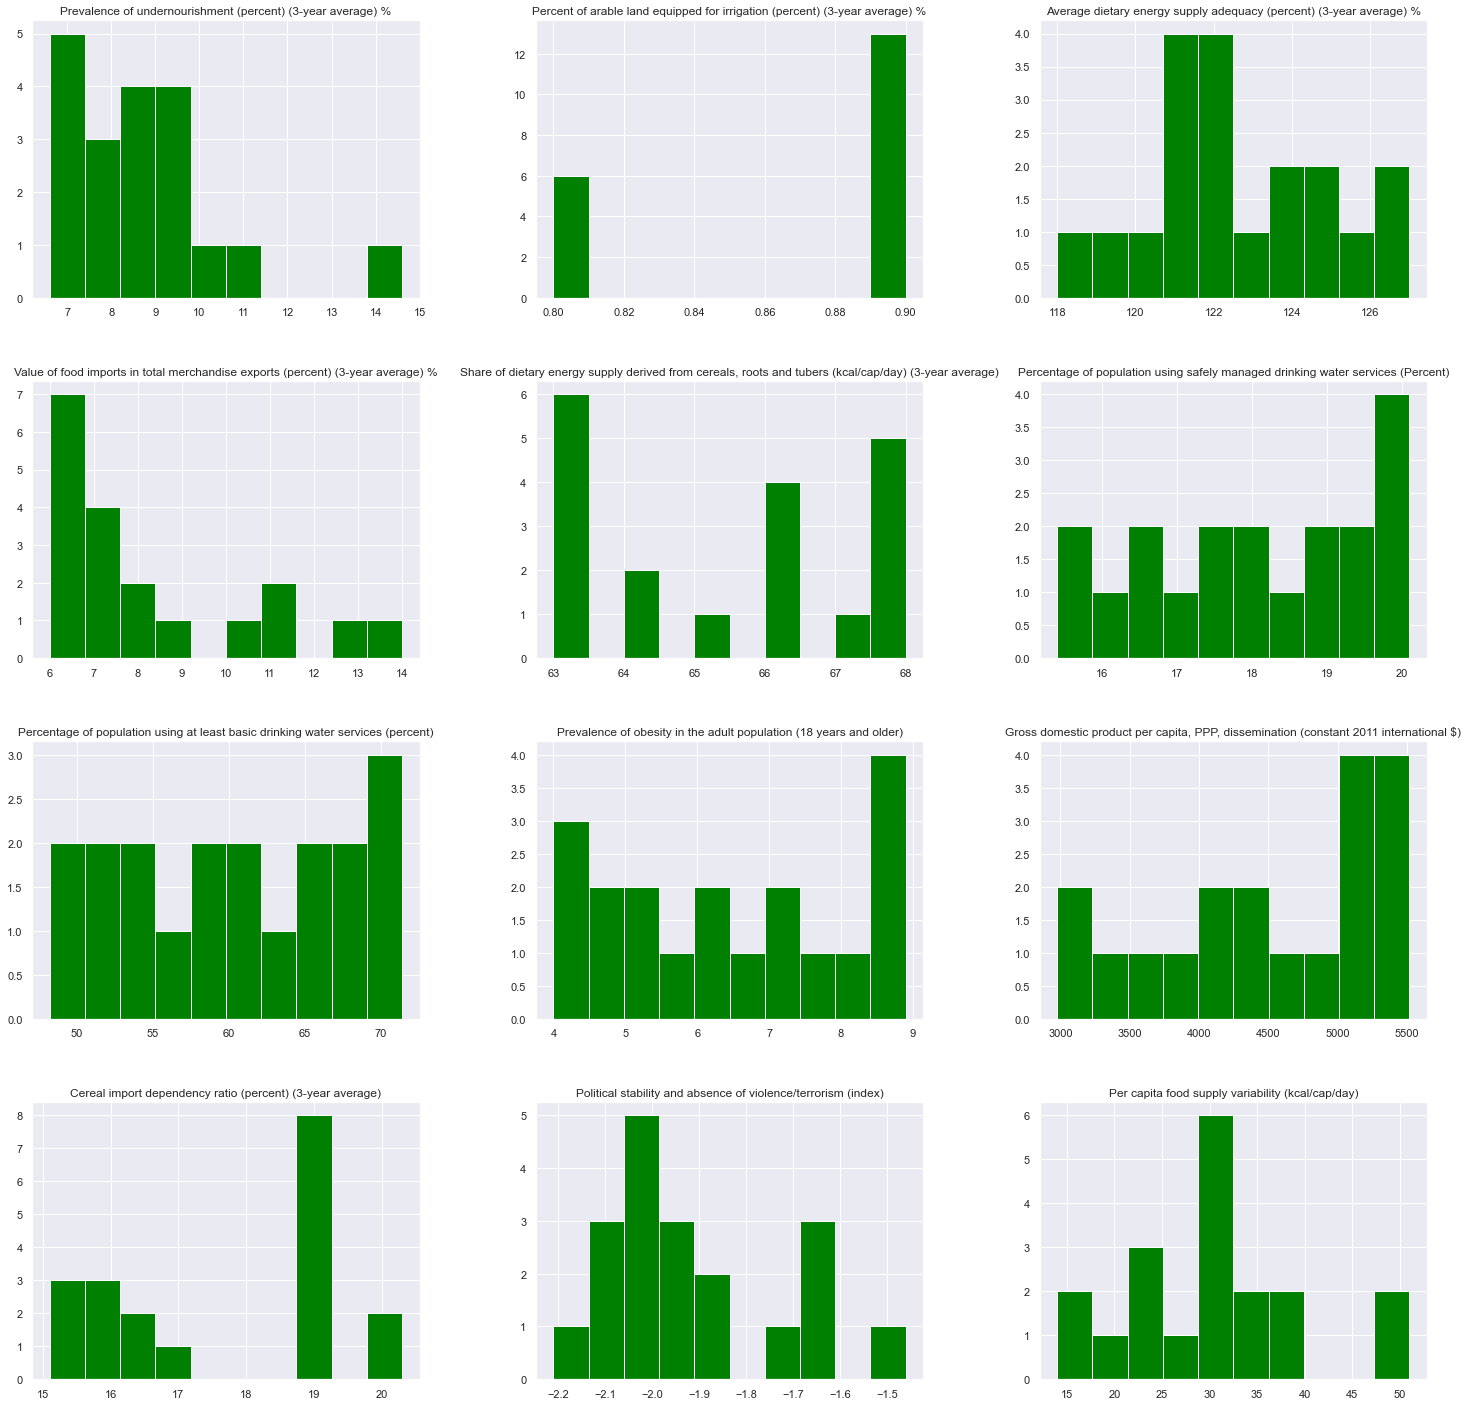

In [27]:
df.hist(figsize=(25,25),bins=10, color = "Green")
plt.savefig("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/All Histograms.png")

In [28]:
# Plotting q-q plot for test for normality

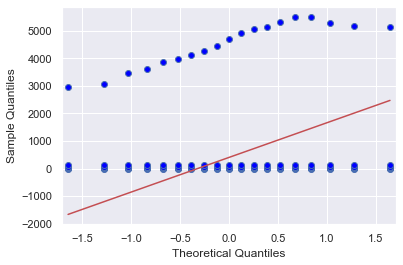

In [30]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(df, line='s').gca().lines

In [14]:
df = df.drop(['Year'], axis=1)

# The T-test and P-value (Statistical Test)

In [98]:
from scipy import stats

In [99]:
stats.ttest_1samp(data['Prevalence of undernourishment (percent) (3-year average) %'], 0)   

Ttest_1sampResult(statistic=20.798434968895165, pvalue=4.8952859171086113e-14)

# The Skew and the Kurtosis

In [145]:
ax = sns.boxplot(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [142]:
df_x = pd.DataFrame(round(df.skew(axis=0, skipna=True),2), columns = {'Skew'})
df_x

,Skew
Prevalence of undernourishment (percent) (3-year average) %,1.83
Percent of arable land equipped for irrigation (percent) (3-year average) %,-0.86
Average dietary energy supply adequacy (percent) (3-year average) %,0.19
Value of food imports in total merchandise exports (percent) (3-year average) %,1.17
"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",0.08
Percentage of population using safely managed drinking water services (Percent),-0.22
Percentage of population using at least basic drinking water services (percent),-0.05
Prevalence of obesity in the adult population (18 years and older),0.12
"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",-0.52
Cereal import dependency ratio (percent) (3-year average),-0.13


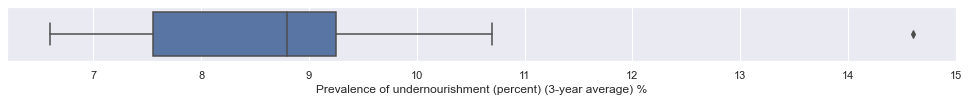

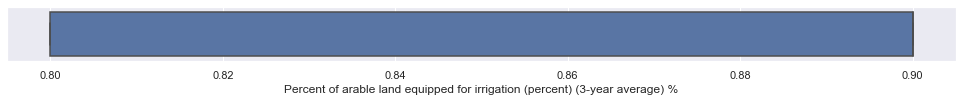

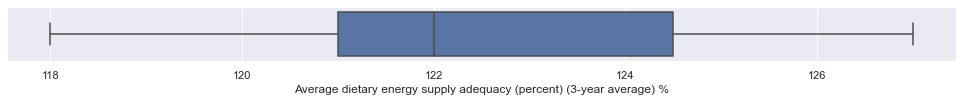

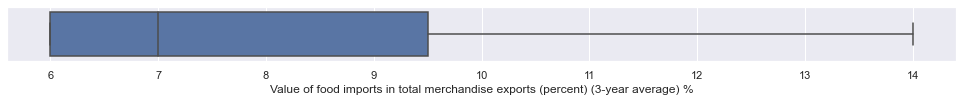

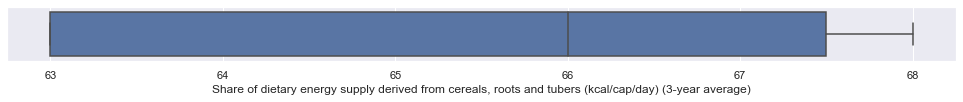

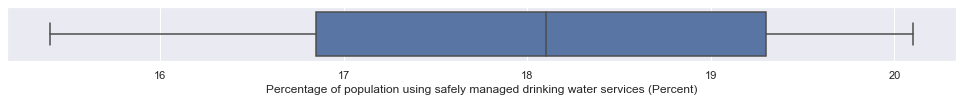

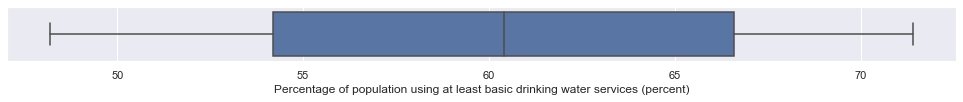

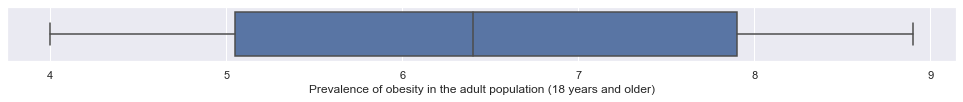

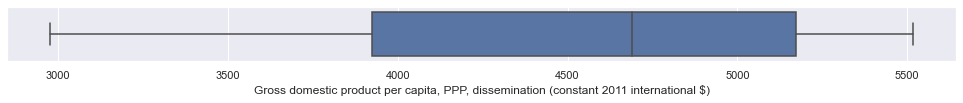

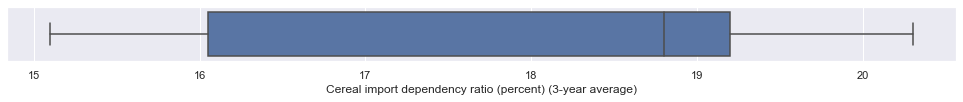

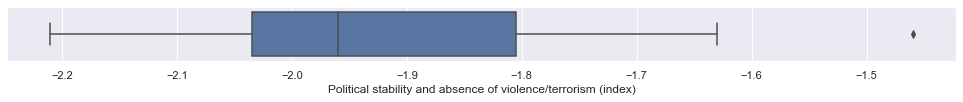

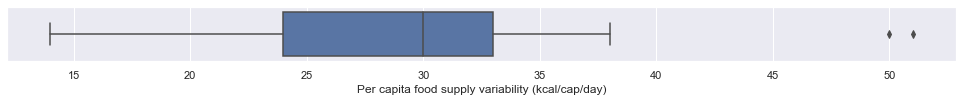

In [147]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
        plt.savefig("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/Boxplot of df.png")


In [71]:
"""
A positive value tells you that you have heavy-tails (i.e. a lot of data in your tails).
A negative value means that you have light-tails (i.e. little data in your tails).

"""

'\nA positive value tells you that you have heavy-tails (i.e. a lot of data in your tails).\nA negative value means that you have light-tails (i.e. little data in your tails).\n\n'

In [137]:
round(df.kurtosis(axis=0), 2)

Prevalence of undernourishment (percent) (3-year average) %                                              5.30
Percent of arable land equipped for irrigation (percent) (3-year average) %                             -1.42
Average dietary energy supply adequacy (percent) (3-year average) %                                     -0.64
Value of food imports in total merchandise exports (percent) (3-year average) %                          0.33
Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)   -1.66
Percentage of population using safely managed drinking water services (Percent)                         -1.18
Percentage of population using at least basic drinking water services (percent)                         -1.27
Prevalence of obesity in the adult population (18 years and older)                                      -1.39
Gross domestic product per capita, PPP, dissemination (constant 2011 international $)                   -1.00
Cereal imp

In [12]:
# Scale all the data

In [112]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [113]:
sc_X = sc_X.fit_transform(df)


In [117]:
sc_X = pd.DataFrame(sc_X, columns=['Prevalence of undernourishment (percent) (3-year average) %',
       'Percent of arable land equipped for irrigation (percent) (3-year average) %',
       'Average dietary energy supply adequacy (percent) (3-year average) %',
       'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day)'])
sc_X

,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,0.100589,0.679366,-0.653537,-0.447722,-0.682323,-1.775463,-1.633665,-1.496466,-1.905843,-1.419889,2.330773,-1.421418
1,0.100589,0.679366,-0.653537,-0.042640,-1.180944,-1.573060,-1.485537,-1.375475,-1.783881,-0.955753,1.451287,-0.668236
2,-0.068046,-1.471960,-0.252982,-0.042640,-1.180944,-1.303189,-1.297010,-1.254484,-1.307109,-1.245838,1.451287,0.300140
3,-0.461526,-1.471960,0.147573,-0.852803,-1.180944,-1.100787,-1.108482,-1.072998,-1.106743,-0.723685,0.830474,0.730529
4,-0.911219,-1.471960,0.948683,-0.852803,-1.180944,-0.898384,-0.919955,-0.952007,-0.814407,-0.897736,1.244350,-0.022652
5,-1.136065,-1.471960,1.749794,-0.852803,-1.180944,-0.695981,-0.731428,-0.770521,-0.635945,-0.723685,-0.618091,-1.206223
6,-1.192276,-1.471960,1.749794,-0.852803,-1.180944,-0.493579,-0.542901,-0.649530,-0.470425,-1.477906,-0.514622,0.838127
7,-1.079853,-1.471960,1.349238,-0.852803,-0.682323,-0.291176,-0.367840,-0.468044,-0.273917,-1.129804,0.261395,2.236892
8,-0.798796,0.679366,0.948683,-0.852803,-0.183702,-0.088773,-0.179313,-0.286557,-0.061977,-0.491617,-0.462887,2.129295
9,-0.517738,0.679366,0.548128,-0.447722,0.314918,0.046162,0.009214,-0.044576,0.226501,0.900790,-1.549311,0.300140


In [115]:
sc_X.skew(axis=0
         )

Prevalence of undernourishment (percent) (3-year average) %                                              1.831352
Percent of arable land equipped for irrigation (percent) (3-year average) %                             -0.862214
Average dietary energy supply adequacy (percent) (3-year average) %                                      0.194416
Value of food imports in total merchandise exports (percent) (3-year average) %                          1.169928
Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)    0.082224
Percentage of population using safely managed drinking water services (Percent)                         -0.217240
Percentage of population using at least basic drinking water services (percent)                         -0.046023
Prevalence of obesity in the adult population (18 years and older)                                       0.115478
Gross domestic product per capita, PPP, dissemination (constant 2011 international $)   

In [63]:
# skewness of the Normalized Data
from scipy. stats import skew
df_x = pd.DataFrame(skew(sc_X, bias = False), columns = {'Skew'}, index = {'Prevalence of undernourishment (percent) (3-year average) %',
       'Percent of arable land equipped for irrigation (percent) (3-year average) %',
       'Average dietary energy supply adequacy (percent) (3-year average) %',
       'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day)'})
# kurtosis of the Normalized Data
from scipy.stats import kurtosis
df_f = pd.DataFrame(kurtosis(sc_X, bias = False), columns = {
    'Kurtosis'}, index = {'Prevalence of undernourishment (percent) (3-year average) %',
       'Percent of arable land equipped for irrigation (percent) (3-year average) %',
       'Average dietary energy supply adequacy (percent) (3-year average) %',
       'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day)'}
)

In [64]:
ske_kur = pd.concat([df_x,df_f], join = 'outer', axis=1)

In [65]:
ske_kur.set_axis(['Skew', 'Kurtosis'], axis=1)
ske_kur

,Skew,Kurtosis
Prevalence of undernourishment (percent) (3-year average) %,1.831352,5.299221
Percentage of population using at least basic drinking water services (percent),-0.862214,-1.418552
"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",0.194416,-0.636135
Political stability and absence of violence/terrorism (index),1.169928,0.325665
"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",0.082224,-1.664562
Percent of arable land equipped for irrigation (percent) (3-year average) %,-0.217240,-1.180262
Percentage of population using safely managed drinking water services (Percent),-0.046023,-1.273181
Prevalence of obesity in the adult population (18 years and older),0.115478,-1.390722
Per capita food supply variability (kcal/cap/day),-0.522629,-1.003656
Cereal import dependency ratio (percent) (3-year average),-0.127512,-1.731699


In [67]:
ske_kur1 = ske_kur.transpose()

ske_kur1

,Prevalence of undernourishment (percent) (3-year average) %,Percentage of population using at least basic drinking water services (percent),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Political stability and absence of violence/terrorism (index),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Percent of arable land equipped for irrigation (percent) (3-year average) %,Percentage of population using safely managed drinking water services (Percent),Prevalence of obesity in the adult population (18 years and older),Per capita food supply variability (kcal/cap/day),Cereal import dependency ratio (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %
Skew,1.831352,-0.862214,0.194416,1.169928,0.082224,-0.217240,-0.046023,0.115478,-0.522629,-0.127512,0.779979,0.63071
Kurtosis,5.299221,-1.418552,-0.636135,0.325665,-1.664562,-1.180262,-1.273181,-1.390722,-1.003656,-1.731699,-0.042699,0.77714


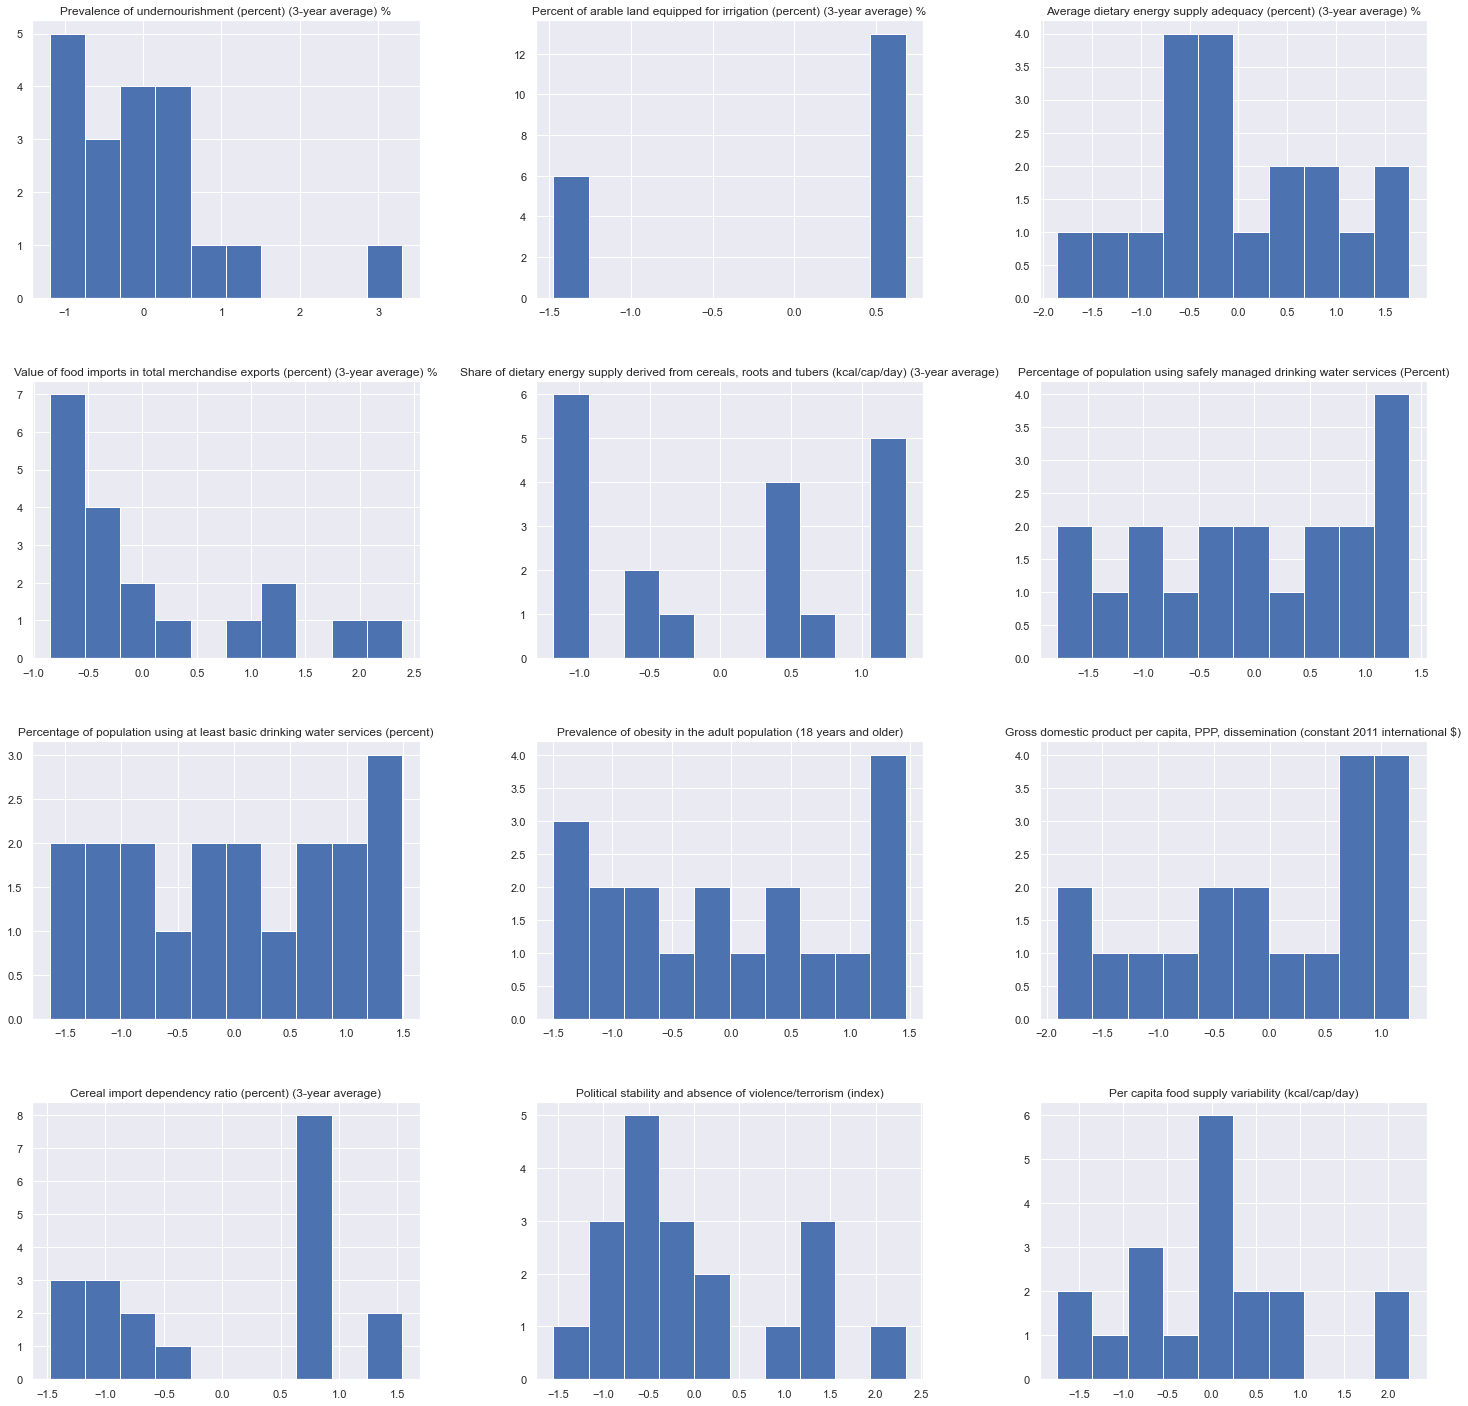

In [24]:
sc_X.hist(figsize=(25,25), bins=(10))
plt.savefig("C:/Users/Emmanuel Aminu/Downloads/Food Security Prediction Model/Images/Transformed Histogram.png")

# compare y = POU and X = Value of imports for testing regression.

In [19]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Average dietary energy supply adequacy (percent) (3-year average) %']]

In [53]:
result = pd.concat([y, x1], axis=1)
result

,Prevalence of undernourishment (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %
0,0.100589,-0.653537
1,0.100589,-0.653537
2,-0.068046,-0.252982
3,-0.461526,0.147573
4,-0.911219,0.948683
5,-1.136065,1.749794
6,-1.192276,1.749794
7,-1.079853,1.349238
8,-0.798796,0.948683
9,-0.517738,0.548128


In [54]:
correlation = result.corr()
correlation

,Prevalence of undernourishment (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %
Prevalence of undernourishment (percent) (3-year average) %,1.000000,-0.889406
Average dietary energy supply adequacy (percent) (3-year average) %,-0.889406,1.000000


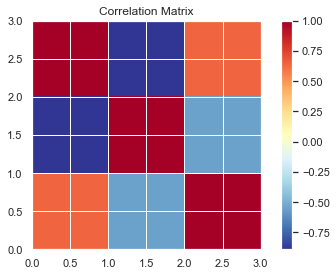

In [73]:
import statsmodels.graphics.api as smg

smg.plot_corr(result.corr(), xnames= None, ax= None, cmap='RdYlBu_r')
plt.show()

In [77]:
import plotly.express as px
fig = px.imshow(result.corr())
fig.show()


<Figure size 7200x7200 with 0 Axes>

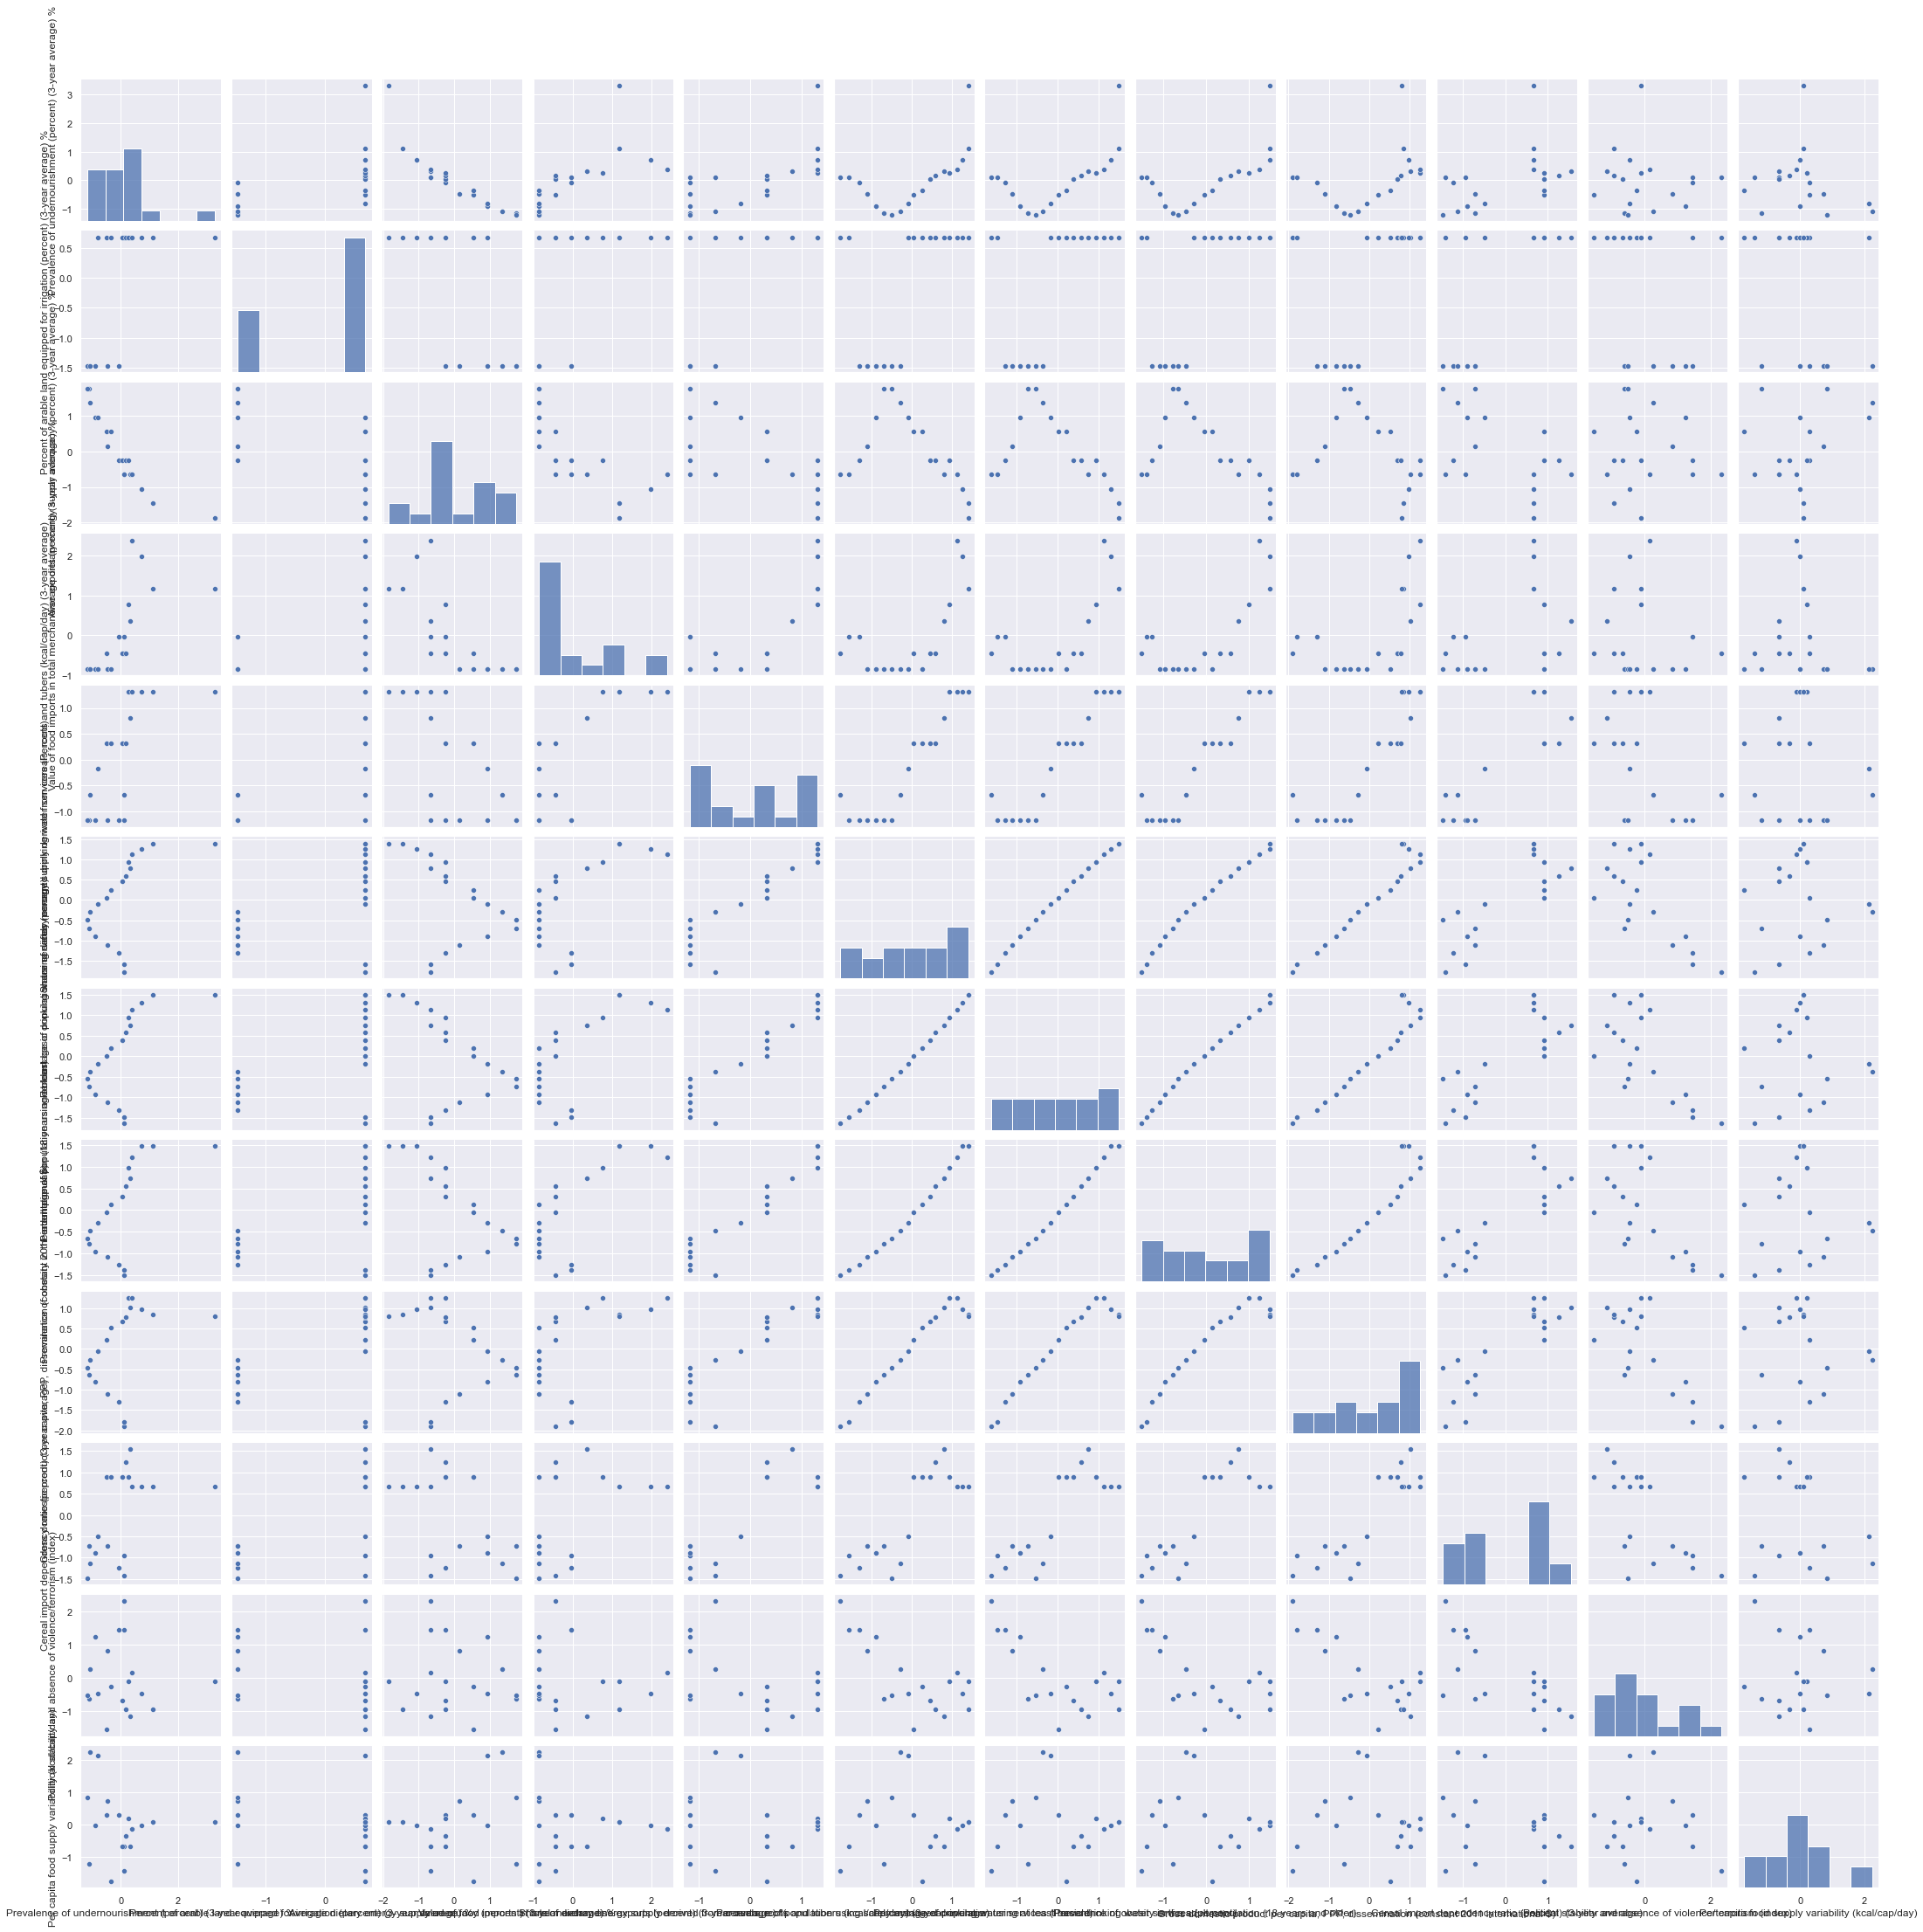

In [89]:
plt.figure(figsize=(100, 100))
sns.pairplot(sc_X)

<AxesSubplot:>

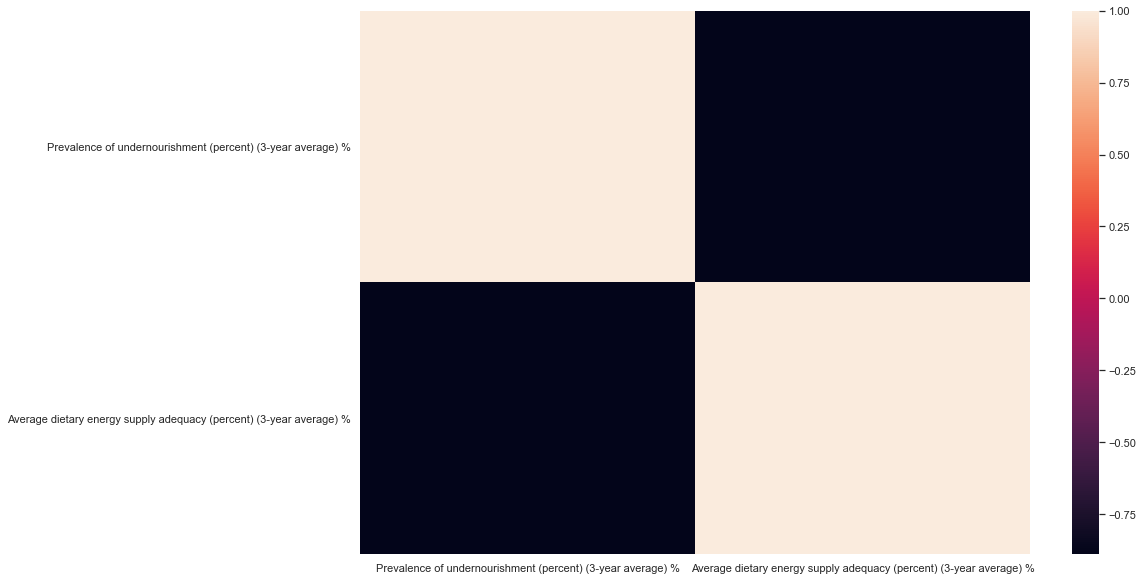

In [59]:
import seaborn as sns


plt.figure(figsize=(15, 10))
sns.heatmap(result.corr())

In [20]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     Prevalence of undernourishment (percent) (3-year average) %   R-squared:                       0.791
Model:                                                                     OLS   Adj. R-squared:                  0.779
Method:                                                          Least Squares   F-statistic:                     64.36
Date:                                                         Tue, 25 Jan 2022   Prob (F-statistic):           3.51e-07
Time:                                                                 21:57:56   Log-Likelihood:                -12.086
No. Observations:                                                           19   AIC:                             28.17
Df Residuals:                                                               17   BIC:                             30.06
Df Model:                                                                    1                                         
Covariance Type:                                                     nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                               -1.735e-16      0.111  -1.56e-15      1.000      -0.234       0.234
Average dietary energy supply adequacy (percent) (3-year average) %    -0.8894      0.111     -8.022      0.000      -1.123      -0.655
==============================================================================
Omnibus:                       28.152   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.004
Skew:                           2.384   Prob(JB):                     2.28e-11
Kurtosis:                       9.259   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x1,y)

LinearRegression()

In [22]:
reg.coef_

array([-0.88940622])

In [23]:
reg.intercept_

-1.447310062398988e-15

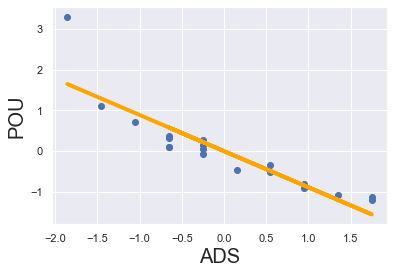

In [24]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x1,y)

# Parametrized version of the regression line
yhat = reg.coef_*x1 + reg.intercept_


# Plotting the regression line
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('ADS', fontsize = 20)
plt.ylabel('POU', fontsize = 20)
plt.show()

In [25]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
# reg_summary = pd.DataFrame([['Bias'],['ADES'],['Import Value'], ['Political Staility'], ['GDP'], ['Cereal Dependency']], columns=['Features'])

# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights' 
# but more often than not, when doing ML we perform some sort of scaling
# reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4] 

,Features,Weights
0,Bias,8.721053
1,ADES,-2.115026
2,Import Value,-0.477760
3,Political Staility,-0.270644
4,GDP,1.020672
5,Cereal Dependency,-1.015365


# try train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.2)

In [27]:
# use the regression model for the dataset
reg=LinearRegression() #creat the object for the regression
reg.fit(X_train, y_train)  #pass the data through the model, reg.fit(1st argument, 2nd argument);
            #1st argument have to be two dimentional or 2D array
            #2nd argument have to be y axis or the output, since y=mx+c

LinearRegression()

In [28]:
predictions = reg.predict(X_test)
predictions

array([ 0.61818084,  0.61818084, -0.47537358, -0.47537358])

In [29]:
y_test

13    0.325435
15    0.381647
10   -0.349103
9    -0.517738
Name: Prevalence of undernourishment (percent) (3-year average) %, dtype: float64

In [30]:
reg.score(X_test, y_test)

0.7490387999029254

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17447856885216143
MSE: 0.039846817593531404
RMSE: 0.19961667664183622


C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


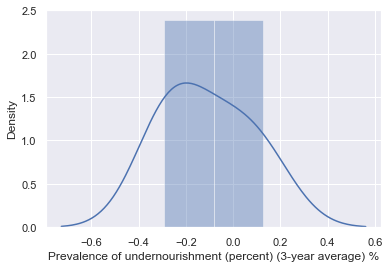

In [32]:
sns.distplot((y_test-predictions));

# USING REGRESSION MODELS

In [33]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))
    print("The score {}".format(y_score))

SVR()
[ 0.22530269  0.22530269 -0.53192876 -0.53192876] 

The mean absolute error 0.11337325605003037
The mean square error 0.01702413724356309
The r2 score 0.8927794446009796
The score 0.8927794446009796
SGDRegressor()
[ 0.53211515  0.53211515 -0.41107607 -0.41107607] 

The mean absolute error 0.13144572408336516
The mean square error 0.02014367106849132
The r2 score 0.8731321553134532
The score 0.8731321553134532
BayesianRidge()
[ 0.60674232  0.60674232 -0.46622276 -0.46622276] 

The mean absolute error 0.1687593096238737
The mean square error 0.036543114455484894
The r2 score 0.7698460149921228
The score 0.7698460149921228
LassoLars()
[0.01065061 0.01065061 0.01065061 0.01065061] 

The mean absolute error 0.3934807917538192
The mean square error 0.16133619256017526
The r2 score -0.016119402985074638
The score -0.016119402985074638
ARDRegression()
[ 0.60674232  0.60674232 -0.46622276 -0.46622276] 

The mean absolute error 0.16875930962387384
The mean square error 0.03654311445548496


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])


MAE: 0.7261558636046215
MSE: 1.4501866562084533
r2_score: -4.498389480739941
RMSE: 1.2042369601571168


# Testing with other Features of  Nutrition Security

In [61]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Average dietary energy supply adequacy (percent) (3-year average) %', 'Prevalence of obesity in the adult population (18 years and older)']]

In [62]:
result = pd.concat([y, x1], axis=1)
result

,Prevalence of undernourishment (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Prevalence of obesity in the adult population (18 years and older)
0,0.100589,-0.653537,-1.496466
1,0.100589,-0.653537,-1.375475
2,-0.068046,-0.252982,-1.254484
3,-0.461526,0.147573,-1.072998
4,-0.911219,0.948683,-0.952007
5,-1.136065,1.749794,-0.770521
6,-1.192276,1.749794,-0.649530
7,-1.079853,1.349238,-0.468044
8,-0.798796,0.948683,-0.286557
9,-0.517738,0.548128,-0.044576


In [64]:
result.corr()

,Prevalence of undernourishment (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Prevalence of obesity in the adult population (18 years and older)
Prevalence of undernourishment (percent) (3-year average) %,1.000000,-0.889406,0.638595
Average dietary energy supply adequacy (percent) (3-year average) %,-0.889406,1.000000,-0.545651
Prevalence of obesity in the adult population (18 years and older),0.638595,-0.545651,1.000000


<AxesSubplot:>

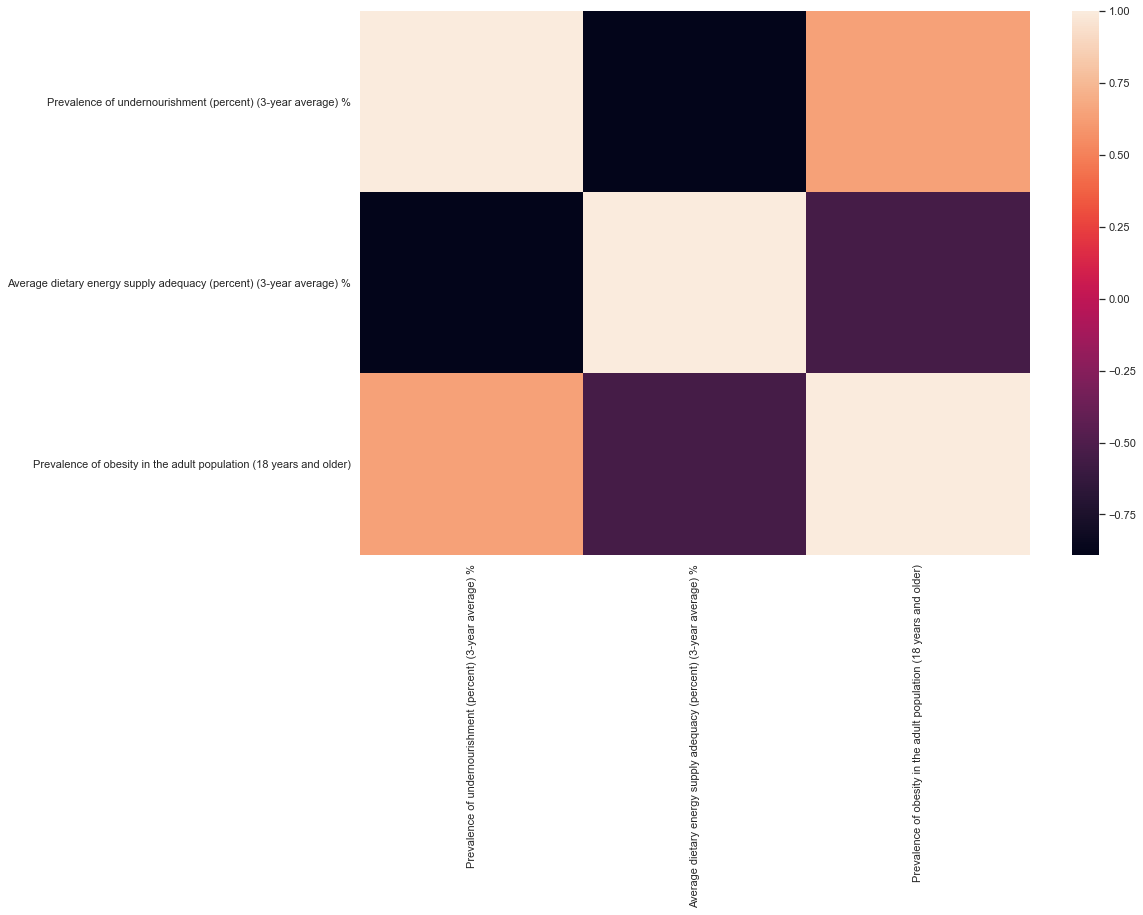

In [63]:
import seaborn as sns


plt.figure(figsize=(15, 10))
sns.heatmap(result.corr())

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

In [56]:
x_scaled = scaler.transform(x1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25)

In [97]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[-0.54571486  0.38973065  0.20708001 -0.86110981 -0.56767303] 

The mean absolute error 0.6355602624816079
The mean square error 0.6140763063651863
The r2 score -1.4662956115353047
SGDRegressor()
[ 0.03257886  0.11194516  0.00865708 -0.03732094 -0.04160502] 

The mean absolute error 0.3528890132714859
The mean square error 0.32523130028025676
The r2 score -0.3062163778357958
BayesianRidge()
[0.10451286 0.10498163 0.10417578 0.10394706 0.10386709] 

The mean absolute error 0.41791619564226234
The mean square error 0.40654800066455393
The r2 score -0.6328061179438553
LassoLars()
[0.10460418 0.10460418 0.10460418 0.10460418 0.10460418] 

The mean absolute error 0.41837447449742793
The mean square error 0.4069903005403477
The r2 score -0.6345825132083291
ARDRegression()
[0.10460991 0.10509227 0.1039446  0.10377895 0.10360773] 

The mean absolute error 0.41778174874916446
The mean square error 0.4063557903541848
The r2 score -0.6320341496395232
PassiveAggressiveRegressor()
[-1.3342317

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])


MAE: 0.5145229781695179
MSE: 1.1310431052759582
r2_score: -1.0841067993870843
RMSE: 1.063505103549559


# Test with Food Availabilty to the PoU

In [60]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Percent of arable land equipped for irrigation (percent) (3-year average) %', 'Cereal import dependency ratio (percent) (3-year average)', 'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)']]

In [61]:
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

In [62]:
x_scaled = scaler.transform(x1)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25)

In [98]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[-0.54571486  0.38973065  0.20708001 -0.86110981 -0.56767303] 

The mean absolute error 0.6355602624816079
The mean square error 0.6140763063651863
The r2 score -1.4662956115353047
SGDRegressor()
[ 0.03231761  0.11001106  0.00669565 -0.03783079 -0.04264014] 

The mean absolute error 0.3526268029549124
The mean square error 0.32415255535936477
The r2 score -0.3018838480886217
BayesianRidge()
[0.10451286 0.10498163 0.10417578 0.10394706 0.10386709] 

The mean absolute error 0.41791619564226234
The mean square error 0.40654800066455393
The r2 score -0.6328061179438553
LassoLars()
[0.10460418 0.10460418 0.10460418 0.10460418 0.10460418] 

The mean absolute error 0.41837447449742793
The mean square error 0.4069903005403477
The r2 score -0.6345825132083291
ARDRegression()
[0.10460991 0.10509227 0.1039446  0.10377895 0.10360773] 

The mean absolute error 0.41778174874916446
The mean square error 0.4063557903541848
The r2 score -0.6320341496395232
PassiveAggressiveRegressor()
[-2.1355086

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])

MAE: 0.7048552582950067
MSE: 0.6252372334937977
r2_score: 0.5581369043899584
RMSE: 0.7907194404425616


# The Health Care Access and Other needs related to PoU

In [66]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)']]

In [68]:
x_scaled = scaler.transform(x1)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.25)

In [70]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[ 0.19195952 -0.76874874  0.19195952  0.24869476 -0.46286942] 

The mean absolute error 0.9294318057816685
The mean square error 2.1554870855143466
The r2 score 0.009966254708007272
SGDRegressor()
[ 0.08936787 -0.27881349  0.08936787  0.06363961 -0.30919582] 

The mean absolute error 1.1356640320169498
The mean square error 2.44742717622036
The r2 score -0.12412433824657287
BayesianRidge()
[-0.19930377 -0.30159352 -0.19930377 -0.20642074 -0.31005048] 

The mean absolute error 1.3004178206411827
The mean square error 3.049813000220566
The r2 score -0.40080532485680664
LassoLars()
[-0.26880106 -0.26880106 -0.26880106 -0.26880106 -0.26880106] 

The mean absolute error 1.3555011764907072
The mean square error 3.2205333452418166
The r2 score -0.4792186467063313
ARDRegression()
[-0.15276215 -0.32219808 -0.15276215 -0.16593728 -0.33548977] 

The mean absolute error 1.2644957109379695
The mean square error 2.9400201501898797
The r2 score -0.3503765251425073
PassiveAggressiveRegressor()
[

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])


MAE: 0.8880674098078082
MSE: 1.9294004069049326
r2_score: -6.5980051991539925
RMSE: 1.389028583904929


# The Houshold Income through GDP in relation to the PoU

In [72]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)']]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.25)

In [79]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[ 0.33848733  0.06730953 -0.84200726 -1.05385184  0.25661169] 

The mean absolute error 0.1811093082769298
The mean square error 0.05138386155539548
The r2 score 0.7910834148496977
SGDRegressor()
[ 0.35002621  0.27408912 -0.13717642  0.02846637  0.32161178] 

The mean absolute error 0.5952028297662225
The mean square error 0.46601552136876323
The r2 score -0.894726639928384
BayesianRidge()
[ 0.3779574   0.31149009 -0.04848829  0.0964979   0.3530864 ] 

The mean absolute error 0.6459081162358499
The mean square error 0.5417401833728137
The r2 score -1.2026080898363833
LassoLars()
[0.15278551 0.15278551 0.15278551 0.15278551 0.15278551] 

The mean absolute error 0.5821909673908546
The mean square error 0.5830328138257493
The r2 score -1.3704957316945272
ARDRegression()
[ 0.3779574   0.31149009 -0.04848829  0.0964979   0.3530864 ] 

The mean absolute error 0.6459081162358499
The mean square error 0.5417401833728137
The r2 score -1.2026080898363833
PassiveAggressiveRegressor()
[ 1.66

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])


MAE: 1.443624813403081
MSE: 3.443064478891311
r2_score: -0.2630263757561968
RMSE: 1.855549643337874


# food accessibility in relationship with the Food Utilization (PoU)

In [81]:
# scale this data.
y = sc_X['Prevalence of undernourishment (percent) (3-year average) %']
x1 = sc_X[['Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day)']]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.25)

In [84]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[-0.54571486  0.38973065  0.20708001 -0.86110981 -0.56767303] 

The mean absolute error 0.6355602624816079
The mean square error 0.6140763063651863
The r2 score -1.4662956115353047
SGDRegressor()
[ 0.03394797  0.11570719  0.01116198 -0.03660873 -0.04050341] 

The mean absolute error 0.3527265283631041
The mean square error 0.32652843497206885
The r2 score -0.31142601964223915
BayesianRidge()
[0.10451286 0.10498163 0.10417578 0.10394706 0.10386709] 

The mean absolute error 0.41791619564226234
The mean square error 0.40654800066455393
The r2 score -0.6328061179438553
LassoLars()
[0.10460418 0.10460418 0.10460418 0.10460418 0.10460418] 

The mean absolute error 0.41837447449742793
The mean square error 0.4069903005403477
The r2 score -0.6345825132083291
ARDRegression()
[0.10460991 0.10509227 0.1039446  0.10377895 0.10360773] 

The mean absolute error 0.41778174874916446
The mean square error 0.4063557903541848
The r2 score -0.6320341496395232
PassiveAggressiveRegressor()
[-0.890284

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test))

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))
print("MSE: " + str(mean_squared_error(y_pred, y_test)))
print("r2_score: " + str(r2_score(y_pred, y_test)))
print("RMSE: " + str(rms))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(mean_squared_error(y_pred, y_test))])
results.append(['Random Forest Regressor', str(r2_score(y_pred, y_test))])
results.append(['Random Forest Regressor', str(rms)])

MAE: 0.4388622430694265
MSE: 0.2991293571602241
r2_score: -2.1264087748828975
RMSE: 0.5469271954842108


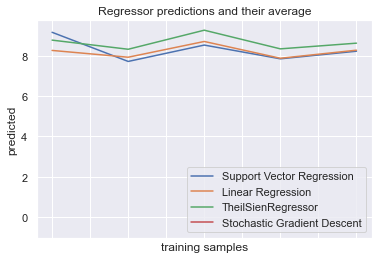

In [196]:
plt.figure()
plt.plot(pred1, label="Support Vector Regression")
plt.plot(predictions, label="Linear Regression")
plt.plot(pred4, label="TheilSienRegressor")
plt.plot(pred2, label="Stochastic Gradient Descent")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()
